In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Merging the DataFrames
1. Combine all vegetation_average.csv, temperatures.csv, and wear csv using the <b>name</b> column as the primary key
2. All recorded temperatures will need to be converted to probabilities
    - Round to the nearest hundredth
    - then divide by 100
    - if the value is greater than or equal to 1, then assign the probability of 1.0
    - ex) 80.190096 -> 0.8019 
    - ex) 101.0231 -> 1.0
3. This combined dataframe should contain the following columns: <b>name, length, wear, vegetation, and 6-1 -> 8-31 </b>for a total of 97 columns


In [2]:
temp = pd.read_csv('temperature_data.csv').rename(columns={'Unnamed: 0':'name'})
temp.iloc[:, 1:] = temp.iloc[:, 1:].round(decimals=0).div(100)
temp.iloc[:, 1:] = temp.iloc[:, 1:].mask(temp.iloc[:, 1:]>1, other = 1.0)

In [3]:
wear = pd.read_csv('wear_data.csv').iloc[:,1:]

In [4]:
veg = pd.read_csv('vegetation_average.csv').iloc[:, 1:]
veg.columns = veg.columns.str.strip()
veg = veg.transpose().reset_index()
veg.rename(columns={'index':'name', veg.columns[1]:'vegetation'}, inplace=True)

In [5]:
merged_df = wear.merge(veg, how='outer', on='name')
merged_df = merged_df.merge(temp, how='outer', on='name')
merged_df

name  length      wear  vegetation   6-1   6-2   6-3  \
0      Humberto Perez Line   short  0.325903    0.373407  0.80  0.93  0.71   
1       Kyle Bradford Line   short  0.076689    0.051829  0.95  0.78  0.95   
2     Daniel Gonzalez Line   short  0.572537    0.954363  0.89  0.87  0.96   
3        Cheryl White Line    long  0.958884    0.249980  0.95  0.89  0.73   
4       Gordon Atkins Line  medium  0.324468    0.583971  0.71  0.77  0.81   
...                    ...     ...       ...         ...   ...   ...   ...   
1795       Ian Correa Line  medium  0.359471    0.796892  0.87  0.95  0.84   
1796     Thomas Guinn Line  medium  0.444667    0.383517  0.73  0.73  0.70   
1797   Charles Sparks Line  medium  0.748239    0.400369  0.96  0.92  0.87   
1798     Linda Santos Line    long  0.652229    0.233560  0.77  0.74  0.85   
1799    Timothy Diehl Line  medium  0.222316    0.573788  0.79  0.85  0.77   

       6-4   6-5   6-6  ...  8-22  8-23  8-24  8-25  8-26  8-27  8-28  8-29  \
0     0.76  0.88  0.91  ...  0.92  0.90  0.95  0.98  1.00  0.79  0.78  0.83   
1     0.87  0.74  0.97  ...  0.97  1.00  0.92  0.77  0.85  1.00  0.79  0.95   
2     0.80  0.72  0.82  ...  0.93  0.79  0.74  0.93  0.99  0.77  0.84  0.77   
3     0.72  0.71  0.91  ...  0.77  0.98  0.84  0.80  0.80  0.81  1.00  0.81   
4     0.71  0.93  0.77  ...  0.94  0.87  0.83  0.97  0.75  0.86  1.00  0.85   
...    ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   
1795  0.74  0.94  0.72  ...  0.86  0.82  0.86  0.81  0.84  0.79  0.80  1.00   
1796  0.77  0.93  0.80  ...  1.00  0.92  0.97  0.82  0.75  1.00  0.74  0.83   
1797  0.80  0.77  0.70  ...  0.99  0.85  1.00  0.77  0.75  0.83  0.87  1.00   
1798  0.90  0.84  0.77  ...  0.95  0.94  0.84  0.88  0.86  0.79  1.00  0.79   
1799  0.79  0.70  0.72  ...  0.76  0.78  1.00  0.74  0.95  0.96  0.96  0.95   

      8-30  8-31  
0     0.83  1.00  
1     0.86  0.91  
2     0.93  0.90  
3     0.99  0.87  
4     0.91  0.76  
...    ...   ...  
1795  0.83  0.85  
1796  1.00  0.83  
1797  0.98  0.92  
1798  0.88  0.93  
1799  0.83  0.87  

[1800 rows x 97 columns]

# Creating FireLineRisk class (1-6)
This class should accept one argument called df that is the dataframe created above. You will refer to this dataframe as self.df throughout the class

1. Create a method called <b>calculate_risk_by_day</b>
    - it must accept vegetation, wear, weather and return the product of the 3
2. Create method called <b>create_risk_df</b>
    - it will generate a dataframe that will be stored as a class attribute called <b>risk_df</b>, it will return nothing.
    - A probability must be calculated for each day using using the formula from step 1
    - this new dataframe should have a column for <b>name, length, and  6-1 -> 8-31</b>
3. Create a method called <b>show_probability_histogram</b>
    - Using matplotlib create a histogram based on the average probabilities of each line
        - remember each line will contain 93 probabilities, it is the average of these values
    - add a parameter called <b>with_average</b> and set it equal to False by default
    - when this parameter is True draw a vertical line where the average of all averages is located
    - Even if with_average is False, generate the average value is it will be stored in your title
    - add this title "Fire Probability by Frequency (Average of {<b>the average you have calculated</b>})"
    - the label of y the axis "Frequency"
    - the label of the x axis "Fire Probability"
4. Create a method called <b>plot_by_length</b>, a plot with three lines, that will contain a list of average probabilities based on <b>length</b> ( short/medium/long )
    - sort the data from least to greatest and plot
    - all lines should be in a different color
    - include a legend that will distinguish which lines belong to what length ( short/medium/long )
    - title: "Probabilities By Line", x axis title: "Lines", y axis title: "Fire Probability"
5. There is a probability threshold of 0.35, when probabilities are greater than this value, the company is forced to shut off power to avoid any fires. This costs <b>150 dollars</b> on a per line basis
    - create a method called <b>total_cost</b> that takes a parameter <b>threshold</b> that is set to 0.35 by default
    - return the total cost for all lines and days
6. Determine the total cost by month and create a bar chart
    - create a method called <b>total_cost_by_month</b> that shows a bar chart for each month and returns dictionary where month ("june", "july", and "august") are the keys and the values are the sum
    - add labels to the chart that best describe each axis and title
    - make sure each are a different color

In [6]:
class FireLineRisk:
    
    def __init__(self, df):
        self.df = df
        
    def calculate_risk_by_day(self, df):
        cal_df = df.copy()
        cal_df.iloc[:,4:] = cal_df.iloc[:,4:].multiply(df.loc[:, 'wear'], axis="index")
        cal_df.iloc[:,4:] = cal_df.iloc[:,4:].multiply(df.loc[:, 'vegetation'], axis="index")
        return cal_df
    
    def create_risk_df(self):
        self.risk_df = self.calculate_risk_by_day(self.df)
        self.risk_df = self.risk_df.drop(columns=['wear', 'vegetation'])
        return
    
    def show_probability_histogram(self, with_average = False):
        df = self.risk_df.copy()
        df['avg'] = df.iloc[:, 2:].mean(axis=1)
        plt.hist(df['avg'])
        avg = df['avg'].mean()
        if with_average == True:
            plt.axvline(x=avg, color='gold') 
        plt.xlabel('Fire Probability')
        plt.ylabel('Frequency')
        plt.title("Fire Probability vs. Frequency (Average of %1.2f)" %avg)
        return
    
    def plot_by_length(self):
        df = self.risk_df.copy()
        df['avg'] = df.iloc[:, 2:].mean(axis=1)
        short = df.loc[df['length']=='short', 
                       ['name', 'length', 'avg']].sort_values(by='avg').reset_index()
        medium = df.loc[df['length']=='medium', 
                        ['name', 'length', 'avg']].sort_values(by='avg').reset_index()
        long = df.loc[df['length']=='long', 
                      ['name', 'length', 'avg']].sort_values(by='avg').reset_index()
        plt.plot(short.index,short['avg'], label='Short Length')
        plt.plot(medium.index,medium['avg'], label='Medium Length')
        plt.plot(long.index,long['avg'], label='Long Length')
        plt.legend()
        plt.xlabel('Lines')
        plt.ylabel('Fire Probability')
        plt.title('Probabilities By Line')
        return
    
    def total_cost(self, threshold=0.35):
        sum_df = self.risk_df.copy()
        sum_df.iloc[:, 2:] = sum_df.iloc[:, 2:].mask(sum_df.iloc[:, 2:]>=threshold, 150)
        sum_df.iloc[:, 2:] = sum_df.iloc[:, 2:].mask(sum_df.iloc[:, 2:]<threshold, 0)
        return sum_df, sum_df.iloc[:, 2:].sum().sum()
    
    def total_cost_by_month(self):
        sum_df, total = self.total_cost()
        june = sum_df.iloc[:, 2:33]
        july = sum_df.iloc[:, 33:64]
        august = sum_df.iloc[:, 64:]
        plt.bar(x = ['June', 'July', 'August'], 
                height = [june.sum().sum(), july.sum().sum(), august.sum().sum()],
               color = ['blue', 'gold', 'magenta'])
        plt.xlabel('Month')
        plt.ylabel('Cost')
        plt.title('Total Cost By Month')
        return june.sum().sum(), july.sum().sum(), august.sum().sum()
        

In [7]:
obj = FireLineRisk(merged_df)
obj.create_risk_df()

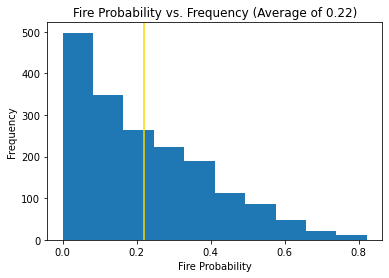

In [8]:
obj.show_probability_histogram(True)

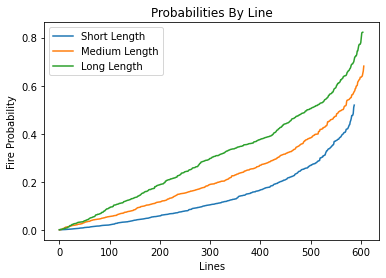

In [9]:
obj.plot_by_length()

june: 1737750.0
july: 2014800.0
aug: 1948950.0
The total cost is 5701500.0
True


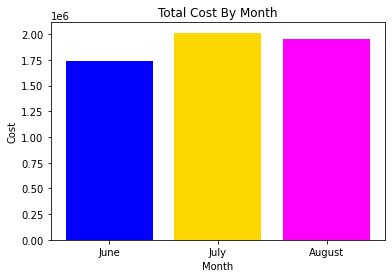

In [10]:
sum_df, total = obj.total_cost()
june, july, aug = obj.total_cost_by_month()
print('june: ' + str(june))
print('july: ' + str(july))
print('aug: ' + str(aug))
print('The total cost is ' + str(june+july+aug))
print(june+july+aug == total)

--- 
# 7. Performing fixed-cost mitigation

Vegetation Management plays a huge role in mitigating fires. Trees that collapse on powerlines may ignite massive fires and cause catastrophic damages.
    - Performing this mitigation action reduces the **vegetation probability in half** at a large cost of **50,000 dollars per line**
    - Determine which lines need vegetation management to save the most money

## Helper function:

In [11]:
def veg_manage(m_threshold, df):
    df = df.copy()
    old = FireLineRisk(df)
    old.create_risk_df()
    before_sum_df, before_cost = old.total_cost()
    before_sum_df['sum'] = before_sum_df.iloc[:, 2:].sum(axis=1)
    to_be_mitigated = before_sum_df.loc[before_sum_df['sum'] > m_threshold]['name']
    df.loc[df['name'].isin(to_be_mitigated), 'vegetation'] = df.loc[df['name'].isin(to_be_mitigated), 'vegetation']*0.5
    new = FireLineRisk(df)
    new.create_risk_df()
    after_sum_df, after_cost = new.total_cost()
    return after_cost+len(to_be_mitigated)*50000


## Reasoning:
We can choose the cost $C$, which is "m_threshold" in the function above, as the variable to be optimized. If the cost of one line is greater than $C$, then we perform a 50000-dollar mitigation and compare the "before_cost" and "after_cost". Our goal is to optimize this variable $C$ to make after_cost as small as possible. 

The maximal cost of one line in 93 days is: $150*93=13950$. Thus, we set the upper limit to be 13950, i.e., over this limit, no mitigation will be performed and no difference between the before_cost and after_cost.

## Optimization:

In [12]:
x = np.empty([100,]).astype(int)
y = np.empty([100,]).astype(int)
index = 0
step_size = 300    
for i in range(0, 13950+3000, step_size): 
    index+=1
    x[index] = index
    y[index] = veg_manage(i, merged_df)
y = y[1:index]
x = x[:index-1]*300

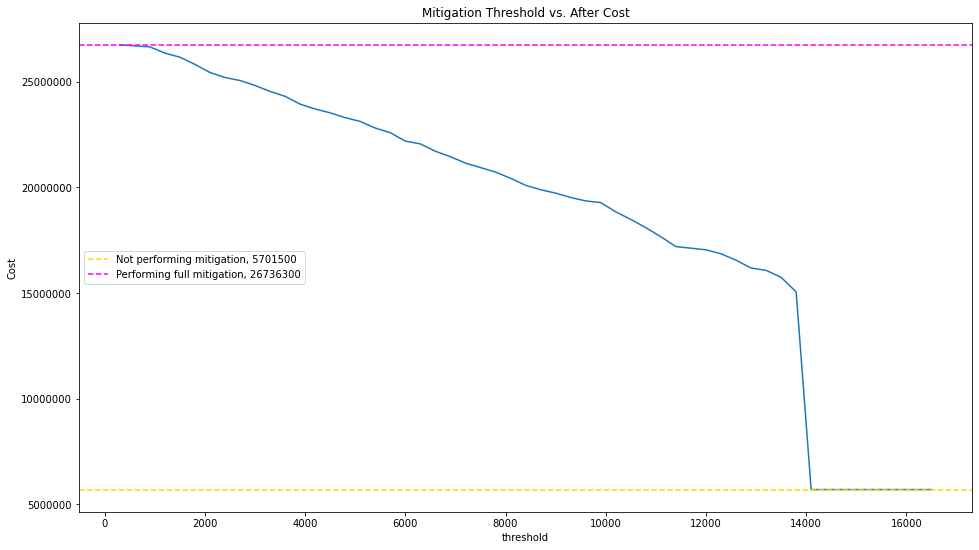

In [13]:
plt.figure(figsize=(16, 9))
plt.plot(x[1:index+2].astype(int), y[1:index+2].astype(int))
plt.axhline(5701500, color='gold',linestyle="--", label='Not performing mitigation, 5701500')
plt.axhline(y[0], color='magenta', linestyle="--", label='Performing full mitigation, %d' %y[0])
plt.legend(loc='center left')
plt.ticklabel_format(style='plain')
plt.xlabel('threshold')
plt.ylabel('Cost')
plt.title('Mitigation Threshold vs. After Cost')
plt.show()

--- 

## Testing section
The following step-by-step test performs mitigation to lines with a shutdown number greater than 0. The final cost is very likely to be accurate because the class functions and the "merged_df" dataframe being used here are correct according to the output of problem 1-6. And the output of problem 1-6 is correct according to the instruction. The function "veg_manage" is not used here.

#### Using the original data with old vegetation:

In [14]:
df = merged_df.copy()
old = FireLineRisk(df)
old.create_risk_df()
print(old.risk_df.shape)
old.risk_df.head()

(1800, 95)


name  length       6-1       6-2       6-3       6-4  \
0   Humberto Perez Line   short  0.097355  0.113176  0.086403  0.092488   
1    Kyle Bradford Line   short  0.003776  0.003100  0.003776  0.003458   
2  Daniel Gonzalez Line   short  0.486303  0.475375  0.524552  0.437127   
3     Cheryl White Line    long  0.227717  0.213335  0.174983  0.172586   
4    Gordon Atkins Line  medium  0.134531  0.145900  0.153479  0.134531   

        6-5       6-6       6-7       6-8  ...      8-22      8-23      8-24  \
0  0.107091  0.110742  0.099789  0.090054  ...  0.111959  0.109525  0.115609   
1  0.002941  0.003855  0.002941  0.003657  ...  0.003855  0.003975  0.003657   
2  0.393414  0.448055  0.437127  0.398878  ...  0.508160  0.431663  0.404342   
3  0.170189  0.218129  0.184571  0.215732  ...  0.184571  0.234908  0.201350   
4  0.176216  0.145900  0.164848  0.157268  ...  0.178111  0.164848  0.157268   

       8-25      8-26      8-27      8-28      8-29      8-30      8-31  
0  0.119260  0.121694  0.096138  0.094921  0.101006  0.101006  0.121694  
1  0.003060  0.003378  0.003975  0.003140  0.003776  0.003418  0.003617  
2  0.508160  0.540944  0.420734  0.458983  0.420734  0.508160  0.491767  
3  0.191762  0.191762  0.194159  0.239702  0.194159  0.237305  0.208541  
4  0.183796  0.142110  0.162953  0.189480  0.161058  0.172427  0.144005  

[5 rows x 95 columns]

#### Calculating the daily cost for each line:

In [15]:
before_sum_df, before_cost = old.total_cost()
print(str(before_cost) + ', consistent with 1-6')

5701500.0, consistent with 1-6


#### Calculate the 93-day-sum of cost for each line, and add a 'sum' column:

In [16]:
before_sum_df['sum'] = before_sum_df.iloc[:, 2:].sum(axis=1)
print('the #2 line shuts down everyday, so 13950, consistent with 1-6')
before_sum_df['sum']

the #2 line shuts down everyday, so 13950, consistent with 1-6


0           0.0
1           0.0
2       13950.0
3           0.0
4           0.0
         ...   
1795        0.0
1796        0.0
1797        0.0
1798        0.0
1799        0.0
Name: sum, Length: 1800, dtype: float64

#### If 'sum' is greater than 0, then perform a vegetation mitigation. That is, if a line has any shutdown throughout 93 days, perform a mitigation on it.

In [17]:
to_be_mitigated = before_sum_df.loc[before_sum_df['sum'] > 0]['name']
df.loc[df['name'].isin(to_be_mitigated), 'vegetation'] = df.loc[df['name'].isin(to_be_mitigated), 'vegetation']*0.5
to_be_mitigated

2         Daniel Gonzalez Line
14           Marion Hayes Line
18            Debbie Hall Line
21            Buford Deno Line
27          Jason Abshire Line
                 ...          
1782    Christopher Bruce Line
1783          John Garcia Line
1786          Julio Reiff Line
1787        Melanie Allen Line
1791         Dana Roberts Line
Name: name, Length: 528, dtype: object

#### Using new data with new vegetation:

In [18]:
new = FireLineRisk(df)
new.create_risk_df()
after_sum_df, after_cost = new.total_cost()

#### Adding up the shutdown cost and the mitigation cost:

In [19]:
after_cost += len(to_be_mitigated)*50000
after_cost

26736300.0

#### Consistent with the plot above.

## Temporary Conclusion
Similar to optimizing the threshold on 'vegetation', optimizing the cost threshold also leads to the same result, as I have mentioned in the meeting: 

**The optimization function is monotonic**, meaning that not performing mitigation is the cheapest solution, and performing full mitigation on all lines is the most expensive one.

--- 
# 8. Mitigation combinations
The company has set the threshold to 0.2, but now vegetation management cost will vary based on length. The users have the ability to choose mitigation of the current lines <b>size or smaller</b>. Meaning if I have a large line I can decide to manage a smaller portion of the line for a smaller fee and for a smaller impact on the vegetation probability
    - small = 15,000 dollars, mitigation impact (small = 0.5, medium = 0.35, large=0.2)
    - medium = 30,000 dollars, mitigation impact (medium = 0.5, large=0.25)
    - large = 50,000 dollars, mitigation impact (large = 0.5)
    
    ex) large line, vegetation probability of 0.8
        - at large vegetation management for 50,000 dollars we reduce the probability of vegetation to 0.4 ((1-0.5) * 0.8)
        - at medium vegetation management for 30,000 dollars we reduce the probability of vegetation to 0.52 ((1-0.35) * 0.8)
        - at small vegetation management for 15,000 dollars we reduce the probability of vegetation to 0.64 ((1-0.2) * 0.8)
        
    - using all of this information, determine the overall cost before vegetation management where the threshold is 0.2
    - determine the lowest cost based on optimal use of the vegetation management system
    - create a dictionary for each line with the following keys and them to list, then create a dataframe with this information
       - original cost
       - reduced cost
       - length
       - mitigation size
    - Fill original cost and reduced cost with the same value if they are identical and set mitigation size to null if no mitigation was performed <b>Mitigation = Vegetation Management</b>


In [20]:
# To be done